<function matplotlib.pyplot.show(close=None, block=None)>

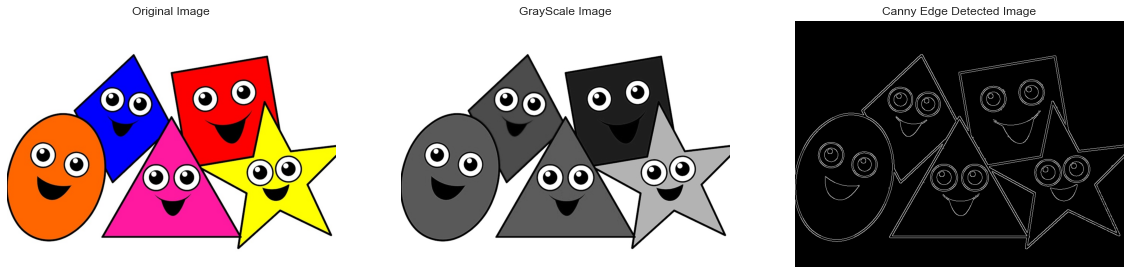

In [1]:
#a) Canny Edge detection
#Canny Edge detection
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

loaded_image=cv2.imread("color.jpg")
loaded_image=cv2.cvtColor(loaded_image,cv2.COLOR_BGR2RGB)

gray_image=cv2.cvtColor(loaded_image,cv2.COLOR_BGR2GRAY)

edged_image=cv2.Canny(gray_image,threshold1=30,threshold2=100)

plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(loaded_image,cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(gray_image,cmap="gray")
plt.axis("off")
plt.title("GrayScale Image")
plt.subplot(1,3,3)
plt.imshow(edged_image,cmap="gray")
plt.axis("off")
plt.title("Canny Edge Detected Image")
plt.show

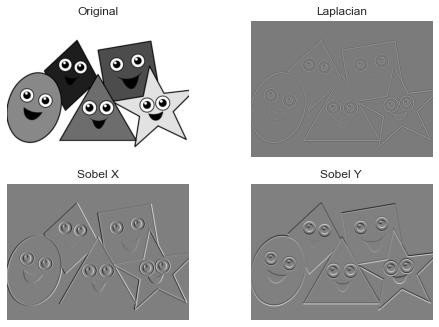

In [3]:
#b) Edge detection schemes - the gradient (Sobel - first order derivatives)
#based edge detector and the Laplacian (2nd order derivative, so it is
#extremely sensitive to noise) based edge detector.
#LapLacian and Sobel Edge detecting methods
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Loading image
#img0=cv2.imread('sanFrancisco.jpg',)
img0=cv2.imread("color.jpg")

#Converting to gray scale
gray=cv2.cvtColor(img0,cv2.COLOR_BGR2GRAY)

#remove noise
img=cv2.GaussianBlur(gray,(3,3),0)

#covolute with proper kernels
laplacian=cv2.Laplacian(img,cv2.CV_64F)
sobelx=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5) #X
sobely=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5) #y

plt.subplot(2,2,1),plt.imshow(img,cmap='gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap='gray')
plt.title('Laplacian'),plt.xticks([]),plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap='gray')
plt.title('Sobel X'),plt.xticks([]),plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap='gray')
plt.title('Sobel Y'),plt.xticks([]),plt.yticks([])

plt.show()

In [6]:
#c) Edge detection using Prewitt Operator
#Edge detection using Prewitt operator
import cv2
import numpy as np
from matplotlib import pyplot as plt
img=cv2.imread('color.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_gaussian=cv2.GaussianBlur(gray,(3,3),0)

#prewitt
kernelx=np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely=np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx=cv2.filter2D(img_gaussian,-1,kernelx)
img_prewitty=cv2.filter2D(img_gaussian,-1,kernely)

cv2.imshow("Original Image",img)
cv2.imshow("Prewitt X", img_prewittx)
cv2.imshow("Prewitt Y", img_prewitty)
cv2.imshow("Prewitt",img_prewittx+img_prewitty)
cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
#d) Roberts Edge Detection- Roberts cross operator
#Roberts Edge Detection- Roberts cross operator
import cv2
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
roberts_cross_v=np.array([[1,0],[0,-1]])
roberts_cross_h=np.array([[0,1],[-1,0]])

img=cv2.imread("color.jpg",0).astype('float64')
img/=255.0
vertical=ndimage.convolve(img,roberts_cross_v)
horizontal=ndimage.convolve(img,roberts_cross_h)

edged_img=np.sqrt(np.square(horizontal)+np.square(vertical))
edged_img*=255
cv2.imwrite("Output.jpg",edged_img)
cv2.imshow("OutputImage",edged_img)
cv2.waitKey()
cv2.destroyAllWindows()